In [1]:
from sklearn.datasets import fetch_openml

In [2]:
df = fetch_openml("mtp", version=1)

df.data.head()

,oz1,oz2,oz3,oz4,oz5,oz6,oz7,oz8,oz9,oz10,...,oz193,oz194,oz195,oz196,oz197,oz198,oz199,oz200,oz201,oz202
0,0.076923,0.325000,0.035088,0.200000,0.162112,0.194562,0.003900,0.060606,0.166667,0.045872,...,0.013874,0.071602,0.056880,0.179132,0.505899,0.039213,0.091327,0.321109,0.127564,0.188387
1,0.230769,0.375000,0.042105,0.333333,0.464191,0.622795,0.077623,0.373737,0.305556,0.192661,...,0.006342,0.186056,0.287438,0.384236,0.683820,0.326584,0.117990,0.456665,0.475618,0.401935
2,0.269231,0.437500,0.052632,0.333333,0.506556,0.531840,0.054374,0.212121,0.333333,0.229358,...,0.005018,0.179544,0.117431,0.384550,0.499219,0.204885,0.155967,0.360441,0.497968,0.407742
3,0.153846,0.357143,0.039474,0.266667,0.352880,0.394131,0.019654,0.171717,0.277778,0.091743,...,0.004801,0.091771,0.145349,0.243064,0.630533,0.023469,0.124430,0.336023,0.134458,0.252258
4,0.153846,0.357143,0.039474,0.266667,0.350523,0.320546,0.013154,0.101010,0.166667,0.110092,...,0.011166,0.130755,0.067583,0.250832,0.516053,0.111398,0.125693,0.332113,0.295913,0.253548


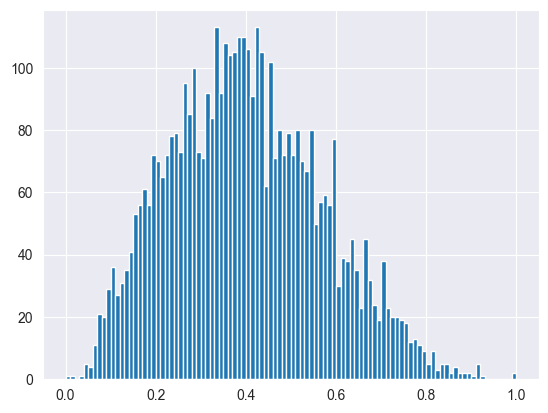

In [3]:
from matplotlib import pyplot as plt

plt.hist(df.target, 100)
_ = plt.plot()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression

baseline = LinearRegression()
baseline.fit(X_train, y_train)
bl_score = baseline.score(X_test, y_test)
bl_score

-1.6511340767823435

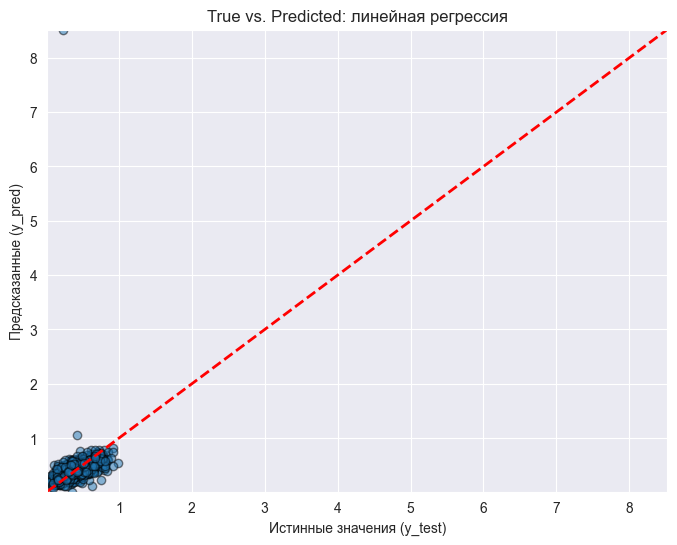

In [6]:
y_pred = baseline.predict(X_test)

# Определяем границы для линии y = x
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

# Рисуем
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolor='k')
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)  # идеальная прямая
plt.xlabel('Истинные значения (y_test)')
plt.ylabel('Предсказанные (y_pred)')
plt.title('True vs. Predicted: линейная регрессия')
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)
plt.grid(True)
plt.show()

In [7]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=15).fit(X_train, y_train)

Text(0.5, 0, 'Feature Importance')

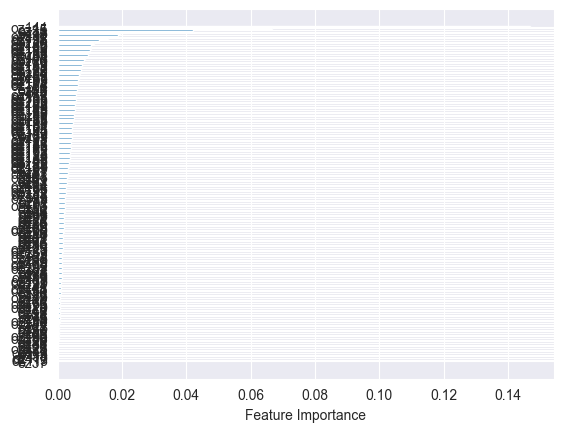

In [8]:
sort = rf.feature_importances_.argsort()
plt.barh(df.data.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [9]:
rf.feature_importances_[sort][-10:]

array([0.01142336, 0.01285493, 0.01560464, 0.01600108, 0.01862343,
       0.01948037, 0.04218912, 0.04224118, 0.06672672, 0.14684967])

In [10]:
df.data.columns[sort][-10:]

Index(['oz20', 'oz137', 'oz198', 'oz112', 'oz197', 'oz18', 'oz48', 'oz35',
       'oz15', 'oz141'],
      dtype='object')

In [11]:
trimmed = df.data[df.data.columns[sort][-20:]]
trimmed.head()

,oz123,oz114,oz161,oz56,oz158,oz154,oz146,oz160,oz180,oz155,oz20,oz137,oz198,oz112,oz197,oz18,oz48,oz35,oz15,oz141
0,0.035842,0.103339,0.382067,0.126277,0.800120,0.030205,0.011997,0.865588,0.002655,0.752291,0.000000,0.000000,0.039213,0.000000,0.505899,0.0625,0.312855,0.0,0.000000,0.041308
1,0.105006,0.206904,0.383458,0.422015,0.791224,0.016908,0.025932,0.866714,0.002581,0.745984,0.242424,0.278945,0.326584,0.222222,0.683820,0.0625,0.297041,0.4,0.282828,0.212274
2,0.048810,0.103339,0.382596,0.000000,0.798276,0.006922,0.007666,0.865890,0.002722,0.753298,0.388889,0.000000,0.204885,0.000000,0.499219,0.1250,0.288557,0.0,0.388889,0.063643
3,0.105778,0.043284,0.382776,0.000000,0.800965,0.001240,0.021463,0.865875,0.002473,0.767469,0.095238,0.039437,0.023469,0.000000,0.630533,0.0000,0.310692,0.1,0.111111,0.031193
4,0.048810,0.103339,0.383539,0.000000,0.802893,0.011829,0.006780,0.865112,0.002810,0.741548,0.260870,0.000000,0.111398,0.000000,0.516053,0.0625,0.286581,0.0,0.304348,0.063643


In [14]:
X_train, X_test, y_train, y_test = train_test_split(trimmed, df.target, test_size=0.25, random_state=42)

better = LinearRegression()
better.fit(X_train, y_train)

print(bl_score)
better.score(X_test, y_test)

-1.6511340767823435


0.3718597857215884

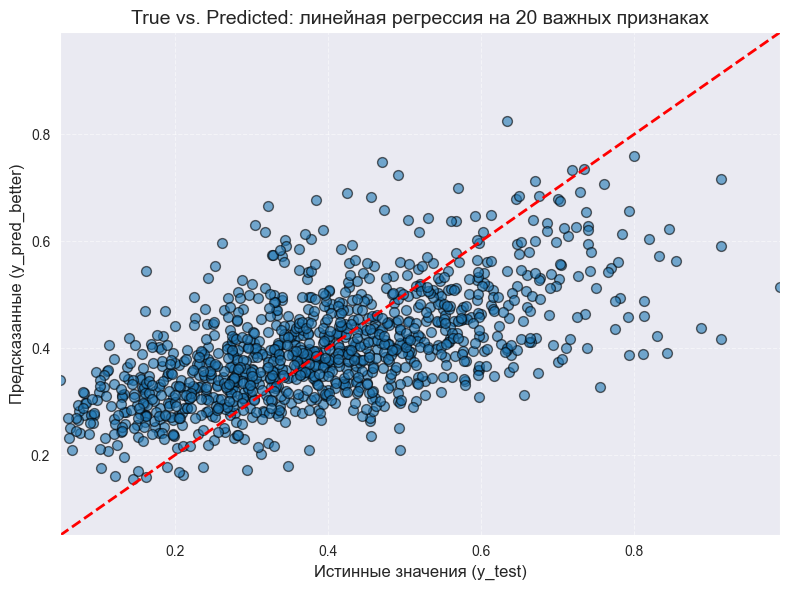

In [16]:
# Предсказания «улучшенной» модели
y_pred_better = better.predict(X_test)

# Определяем границы для линии y = x
min_val = min(y_test.min(), y_pred_better.min())
max_val = max(y_test.max(), y_pred_better.max())

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_better, alpha=0.6, edgecolor='k', s=50)
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)  # идеальная прямая
plt.xlabel('Истинные значения (y_test)', fontsize=12)
plt.ylabel('Предсказанные (y_pred_better)', fontsize=12)
plt.title('True vs. Predicted: линейная регрессия на 20 важных признаках', fontsize=14)
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [17]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(RandomForestRegressor(n_estimators=15)).fit(df.data, df.target)
X_trimmed = sfm.transform(df.data)
X_trimmed.shape

(4450, 49)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_trimmed, df.target, test_size=0.25, random_state=42)

better = LinearRegression()
better.fit(X_train, y_train)

print(bl_score)
better.score(X_test, y_test)

-1.6511340767823435


0.4355396928937689

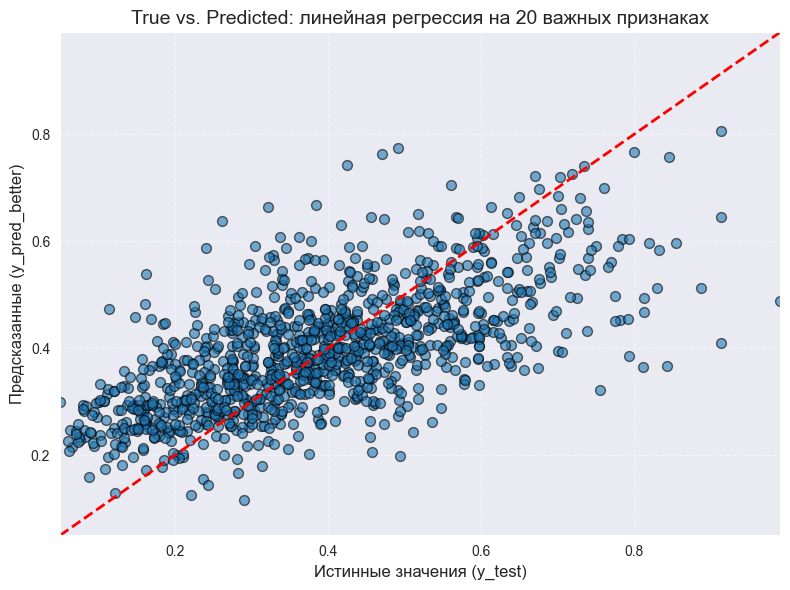

In [19]:
y_pred_better = better.predict(X_test)

# Определяем границы для линии y = x
min_val = min(y_test.min(), y_pred_better.min())
max_val = max(y_test.max(), y_pred_better.max())

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_better, alpha=0.6, edgecolor='k', s=50)
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)  # идеальная прямая
plt.xlabel('Истинные значения (y_test)', fontsize=12)
plt.ylabel('Предсказанные (y_pred_better)', fontsize=12)
plt.title('True vs. Predicted: линейная регрессия на 20 важных признаках', fontsize=14)
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [20]:
df = fetch_openml("balance-scale", version=1)

df.data.head()

,left-weight,left-distance,right-weight,right-distance
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


In [21]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42, stratify=df.target)

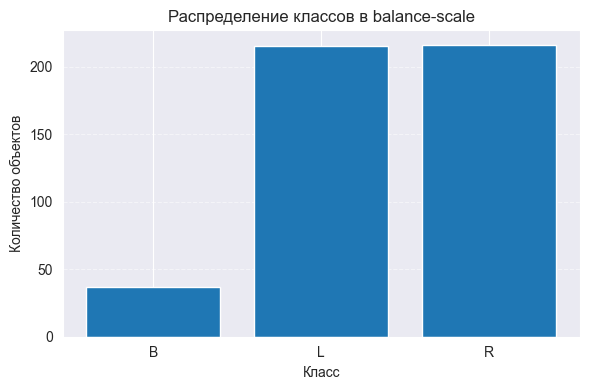

In [22]:
counts = y_test.value_counts().sort_index()

# Строим столбчатую диаграмму
plt.figure(figsize=(6, 4))
plt.bar(counts.index, counts.values)
plt.xlabel('Класс')
plt.ylabel('Количество объектов')
plt.title('Распределение классов в balance-scale')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [23]:
from sklearn.linear_model import LogisticRegression

baseline = LogisticRegression()
baseline.fit(X_train, y_train)
bl_score = baseline.score(X_test, y_test)
bl_score

0.8598726114649682

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, baseline.predict(X_test)))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        12
           L       0.87      0.92      0.89        73
           R       0.86      0.94      0.90        72

    accuracy                           0.86       157
   macro avg       0.58      0.62      0.60       157
weighted avg       0.80      0.86      0.83       157



In [25]:
print(confusion_matrix(y_test, baseline.predict(X_test)))

[[ 0  6  6]
 [ 1 67  5]
 [ 0  4 68]]


In [26]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{'B': np.float64(4.216216216216216),
 'L': np.float64(0.7255813953488373),
 'R': np.float64(0.7222222222222222)}

In [27]:
weighted = LogisticRegression(class_weight=class_weights)
weighted.fit(X_train, y_train)
print(bl_score)
weighted.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

In [28]:
y_train.value_counts()

class
R    216
L    215
B     37
Name: count, dtype: int64

In [29]:
X_train["target"] = y_train

In [30]:
oversampled = X_train[X_train.target == "B"].sample(n=216-37, replace=True, ignore_index=True)

In [32]:
import pandas as pd

oversampled = pd.concat([X_train, oversampled])
print(oversampled.shape)
oversampled.head()

(647, 5)


,left-weight,left-distance,right-weight,right-distance,target
262,3,1,3,3,R
401,4,2,1,2,L
174,2,2,5,5,R
81,1,4,2,2,B
36,1,2,3,2,R


In [33]:
y_train_OS = oversampled.target
X_train_OS = oversampled.drop(["target"], axis=1)

In [34]:
OSmodel = LogisticRegression()
OSmodel.fit(X_train_OS, y_train_OS)
print(bl_score)
OSmodel.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

In [35]:
print(classification_report(y_test, OSmodel.predict(X_test)))

              precision    recall  f1-score   support

           B       0.61      0.92      0.73        12
           L       0.97      0.92      0.94        73
           R       0.96      0.93      0.94        72

    accuracy                           0.92       157
   macro avg       0.85      0.92      0.87       157
weighted avg       0.94      0.92      0.93       157



In [36]:
df = fetch_openml("CPMP-2015-regression", version=1)
df.data.drop(["instance_id"], inplace=True, axis=1)
df.data = pd.get_dummies(df.data)
df.data.head()

C:\Users\bulat\AppData\Local\Temp\ipykernel_196408\1362267038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.data.drop(["instance_id"], inplace=True, axis=1)


,repetition,stacks,tiers,stack.tier.ratio,container.density,empty.stack.pct,overstowing.stack.pct,overstowing.2cont.stack.pct,group.same.min,group.same.max,...,avg.l1.top.left.lg.group,cont.empty.grt.estack,pct.bottom.pct.on.top,algorithm_astar.symmulgt.transmul,algorithm_astar.symmullt.transmul,algorithm_idastar.symmulgt.transmul,algorithm_idastar.symmullt.transmul,runstatus_memout,runstatus_ok,runstatus_timeout
0,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,True,False,False,False,False,True,False
1,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,True,False,False,False,True,False
2,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,False,True,False,False,True,False
3,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,False,False,True,False,False,True
4,1,16,5,0.3125,0.6,0.1875,0.5625,1.000000,0,7,...,0.663462,0.3375,0.0,True,False,False,False,True,False,False


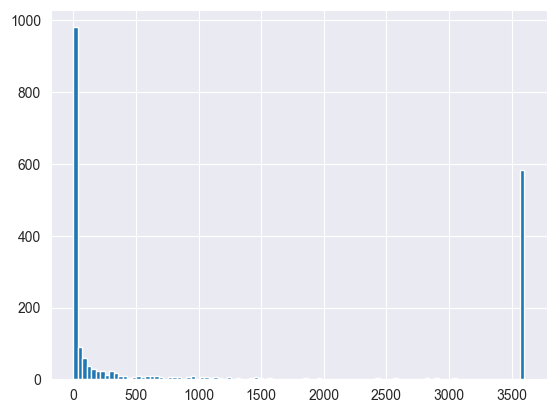

In [37]:
plt.hist(df.target, 100)
_ = plt.plot()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

In [40]:
from sklearn.preprocessing import KBinsDiscretizer

y_binned = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform").fit_transform(pd.DataFrame(y_train))

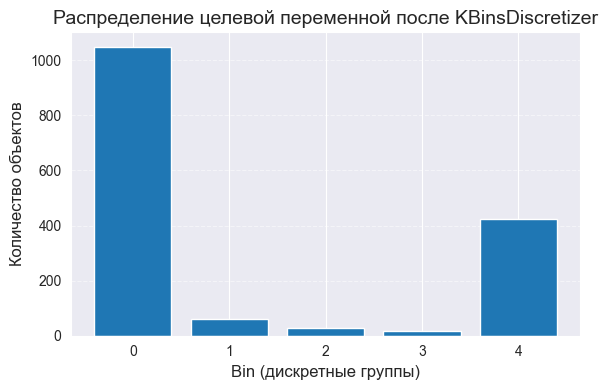

In [41]:
bins = y_binned.flatten().astype(int)

# Считаем количество объектов в каждом бинне
unique_bins, counts = np.unique(bins, return_counts=True)

# Строим столбчатую диаграмму
plt.figure(figsize=(6, 4))
plt.bar(unique_bins, counts)
plt.xlabel('Bin (дискретные группы)', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)
plt.title('Распределение целевой переменной после KBinsDiscretizer', fontsize=14)
plt.xticks(unique_bins)            # метки оси X — номера биннов
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [42]:
y_binned = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile").fit_transform(pd.DataFrame(y_train))

C:\Users\bulat\PycharmProjects\machineLearning\.venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


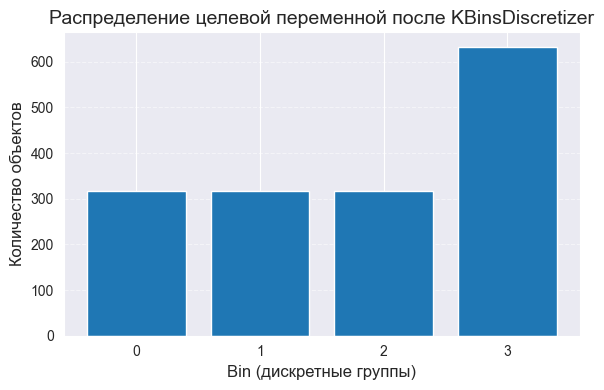

In [43]:
bins = y_binned.flatten().astype(int)

# Считаем количество объектов в каждом бинне
unique_bins, counts = np.unique(bins, return_counts=True)

# Строим столбчатую диаграмму
plt.figure(figsize=(6, 4))
plt.bar(unique_bins, counts)
plt.xlabel('Bin (дискретные группы)', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)
plt.title('Распределение целевой переменной после KBinsDiscretizer', fontsize=14)
plt.xticks(unique_bins)            # метки оси X — номера биннов
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Сводка по лабе

# Эта лабораторная работа про то, как улучшить работу моделей машинного обучения. Сначала мы научились выбирать только самые важные признаки (столбцы) из данных — чтобы модель работала быстрее и точнее. Затем мы попробовали разные способы отбора признаков, такие как фильтрация по дисперсии, тест χ², регуляризация и другие.
# 
# После этого мы изучили, как превратить задачу предсказания чисел (регрессии) в задачу классификации — с помощью разделения значений на группы (дискретизация). И наконец, мы поработали с несбалансированными данными — когда одного класса слишком много, а другого мало. мы применили методы, которые делают классы равными по количеству: добавление примеров (оверсемплинг), уменьшение (андерсемплинг) и генерация новых (SMOTE).
# 
# В итоге мы увидели, как всё это влияет на точность модели и поняли, что даже простые приёмы могут сильно улучшить результат.

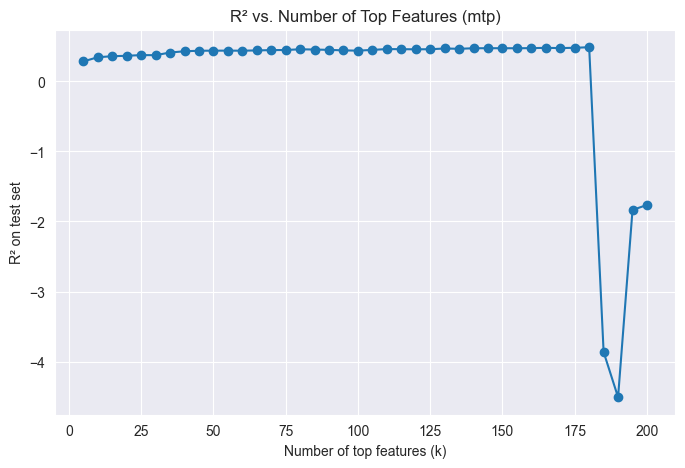


Методы отбора признаков (mtp):
                                 R2
SequentialForward          0.451026
SelectKBest(f_regression)  0.358297
SelectKBest(mutual_info)   0.262287
L1_SelectFromModel         0.174027
RFE                        0.072981
VarianceThreshold         -1.651134
All features              -1.651134
Baseline accuracy: 0.8598726114649682
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        12
           L       0.87      0.92      0.89        73
           R       0.86      0.94      0.90        72

    accuracy                           0.86       157
   macro avg       0.58      0.62      0.60       157
weighted avg       0.80      0.86      0.83       157

Weighted accuracy: 0.9235668789808917
              precision    recall  f1-score   support

           B       0.61      0.92      0.73        12
           L       0.97      0.92      0.94        73
           R       0.96      0.93      0.94        72

    a

In [46]:
# Исследуйте связь между количеством самых важных признаков, которые использует модель для обучения и тестовой точностью получившейся модели. Обучите несколько моделей с разным количеством наиболее важных признаков. Постройте график зависимости точности модели от количества признаков. Сделайте вывод.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import (
    VarianceThreshold,
    SelectKBest, f_regression, mutual_info_regression,
    RFE, SelectFromModel,
    SequentialFeatureSelector
)
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import r2_score, accuracy_score, classification_report
from sklearn.utils.class_weight import compute_class_weight

# Для балансировки:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# -------------------------------
# Часть 1: Зависимость R² от числа признаков
# -------------------------------
mtp = fetch_openml("mtp", version=1, as_frame=True)
X_mtp, y_mtp = mtp.data, mtp.target.astype(float)
X_train, X_test, y_train, y_test = train_test_split(
    X_mtp, y_mtp, test_size=0.25, random_state=42
)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances_sorted = pd.Series(rf.feature_importances_, index=X_mtp.columns).sort_values(ascending=False)

ks = list(range(5, X_mtp.shape[1] + 1, 5))
r2_scores = []
for k in ks:
    top_k = importances_sorted.index[:k]
    lr = LinearRegression().fit(X_train[top_k], y_train)
    r2_scores.append(r2_score(y_test, lr.predict(X_test[top_k])))

plt.figure(figsize=(8, 5))
plt.plot(ks, r2_scores, marker='o')
plt.xlabel('Number of top features (k)')
plt.ylabel('R² on test set')
plt.title('R² vs. Number of Top Features (mtp)')
plt.grid(True)
plt.show()

#Идеальный случай: Линия графика будет постепенно возрастать и достигать стабилизации, когда точность уже не будет значительно меняться при добавлении новых признаков.
#Возможный случай: Точность может расти с добавлением значимых признаков и может начать снижаться, если будет добавлено слишком много ненужных признаков.

# -------------------------------
# Часть 2: Другие методы отбора признаков
# -------------------------------
methods = {}
methods['All features'] = r2_score(y_test, LinearRegression().fit(X_train, y_train).predict(X_test))

# 2.1 VarianceThreshold
vt = VarianceThreshold(threshold=0.0).fit(X_train)
methods['VarianceThreshold'] = r2_score(
    y_test,
    LinearRegression().fit(vt.transform(X_train), y_train).predict(vt.transform(X_test))
)

# 2.2 SelectKBest (f_regression)
skb_f = SelectKBest(f_regression, k=20).fit(X_train, y_train)
methods['SelectKBest(f_regression)'] = r2_score(
    y_test,
    LinearRegression().fit(
        skb_f.transform(X_train), y_train
    ).predict(skb_f.transform(X_test))
)

# 2.3 SelectKBest (mutual_info_regression)
skb_mi = SelectKBest(mutual_info_regression, k=20).fit(X_train, y_train)
methods['SelectKBest(mutual_info)'] = r2_score(
    y_test,
    LinearRegression().fit(
        skb_mi.transform(X_train), y_train
    ).predict(skb_mi.transform(X_test))
)

# 2.4 RFE
rfe = RFE(LinearRegression(), n_features_to_select=20, step=0.1).fit(X_train, y_train)
methods['RFE'] = r2_score(
    y_test,
    LinearRegression().fit(
        rfe.transform(X_train), y_train
    ).predict(rfe.transform(X_test))
)

# 2.5 SequentialFeatureSelector
sfs = SequentialFeatureSelector(
    LinearRegression(), n_features_to_select=20, direction='forward'
).fit(X_train, y_train)
methods['SequentialForward'] = r2_score(
    y_test,
    LinearRegression().fit(
        sfs.transform(X_train), y_train
    ).predict(sfs.transform(X_test))
)

# 2.6 Отбор по L1-норме (Lasso + SelectFromModel.fit)
lasso = Lasso(alpha=0.01, random_state=42)
sfm = SelectFromModel(estimator=lasso, max_features=20).fit(X_train, y_train)
methods['L1_SelectFromModel'] = r2_score(
    y_test,
    LinearRegression().fit(
        sfm.transform(X_train), y_train
    ).predict(sfm.transform(X_test))
)

# Печать результатов
df_methods = pd.DataFrame.from_dict(methods, orient='index', columns=['R2']).sort_values('R2', ascending=False)
print("\nМетоды отбора признаков (mtp):")
print(df_methods)

# -------------------------------
# Часть 3: Дисбаланс классов (balance-scale)
# -------------------------------
bs = fetch_openml("balance-scale", version=1, as_frame=True)
X_bs, y_bs = bs.data, bs.target
Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    X_bs, y_bs, test_size=0.25, random_state=42, stratify=y_bs
)

# Baseline
base_clf = LogisticRegression(max_iter=1000, random_state=42).fit(Xb_train, yb_train)
print("Baseline accuracy:", base_clf.score(Xb_test, yb_test))
print(classification_report(yb_test, base_clf.predict(Xb_test)))

# Взвешивание классов
classes = np.unique(yb_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=yb_train)
cw = dict(zip(classes, weights))
clf_w = LogisticRegression(class_weight=cw, max_iter=1000, random_state=42).fit(Xb_train, yb_train)
print("Weighted accuracy:", clf_w.score(Xb_test, yb_test))
print(classification_report(yb_test, clf_w.predict(Xb_test)))

# Oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(Xb_train, yb_train)
clf_ros = LogisticRegression(max_iter=1000, random_state=42).fit(X_ros, y_ros)
print("Oversampling accuracy:", clf_ros.score(Xb_test, yb_test))
print(classification_report(yb_test, clf_ros.predict(Xb_test)))

# Undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(Xb_train, yb_train)
clf_rus = LogisticRegression(max_iter=1000, random_state=42).fit(X_rus, y_rus)
print("Undersampling accuracy:", clf_rus.score(Xb_test, yb_test))
print(classification_report(yb_test, clf_rus.predict(Xb_test)))


